Imports

In [2]:
import yfinance as yf
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Loading Dataset

In [3]:
df_individual = pd.read_csv('individual_bank_data.csv')

Dataset Preview

In [4]:
df_individual.head()

,Date,Index,Open,High,Low,Close
0,2023-01-02,HDFC Bank,1622.050049,1639.000000,1618.650024,1629.150024
1,2023-01-03,HDFC Bank,1624.550049,1643.599976,1624.550049,1639.699951
2,2023-01-04,HDFC Bank,1635.000000,1645.750000,1607.449951,1610.550049
3,2023-01-05,HDFC Bank,1614.300049,1618.199951,1590.000000,1599.699951
4,2023-01-06,HDFC Bank,1599.750000,1608.900024,1578.500000,1594.349976


1.Summary Statistics

In [5]:
# Get summary statistics
summary_stats = df_individual.describe()
summary_stats


,Open,High,Low,Close
count,2760.000000,2760.000000,2760.000000,2760.000000
mean,713.186311,719.292042,706.165200,712.836036
std,590.505681,594.732548,585.637656,590.290765
min,44.759998,45.750000,44.410000,44.919998
25%,156.950001,158.987499,153.724998,156.312496
50%,605.875000,611.450012,599.174988,605.225006
75%,1076.424957,1089.425018,1058.125000,1075.075043
max,1980.949951,2063.000000,1955.000000,1994.599976


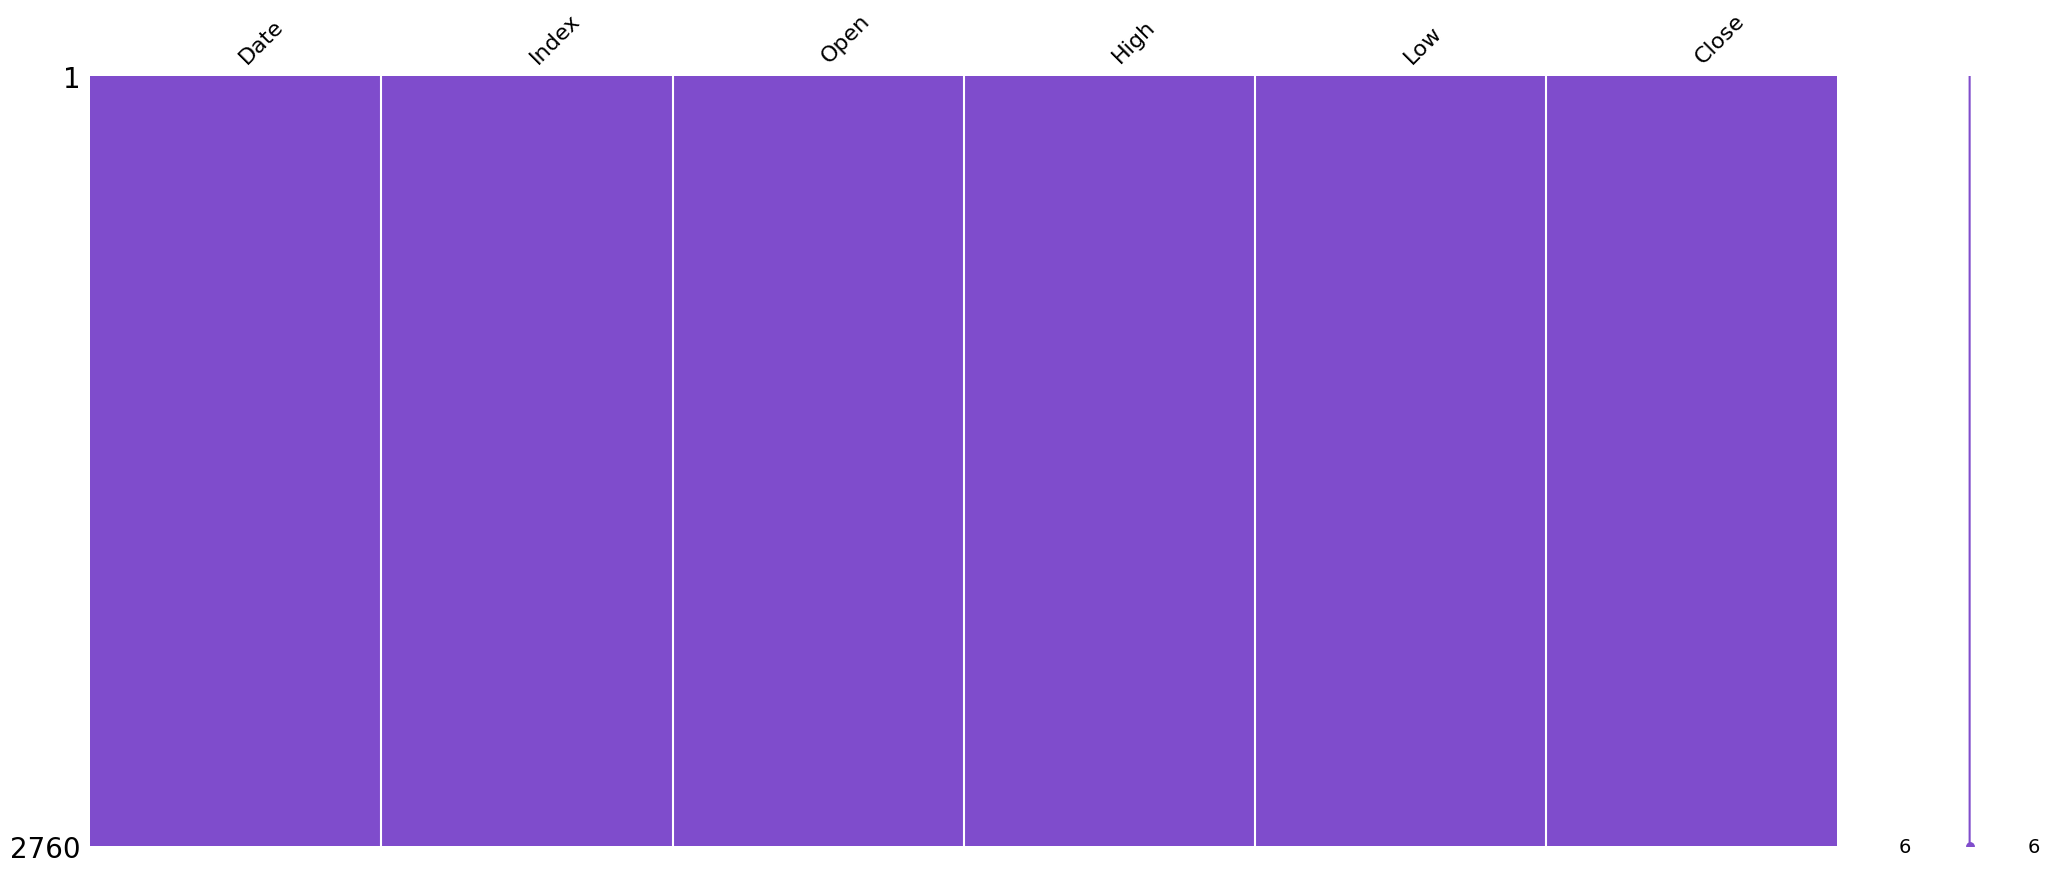

In [6]:
import missingno as msno
df_individual = pd.read_csv('individual_bank_data.csv')
msno.matrix(df_individual , color=(0.50,0.30,0.80))
plt.show()
x = df_individual.isnull().sum()
for a, b in x.items():
 if b > 0:
     print(f"There are {b} missing values in column: {a}")

In [6]:
df_individual['Date'] = pd.to_datetime(df_individual['Date'])
df_individual['Month'] = df_individual['Date'].dt.strftime('%Y-%m')

2.Price Movement Over Time

Line Plot for Close Prices

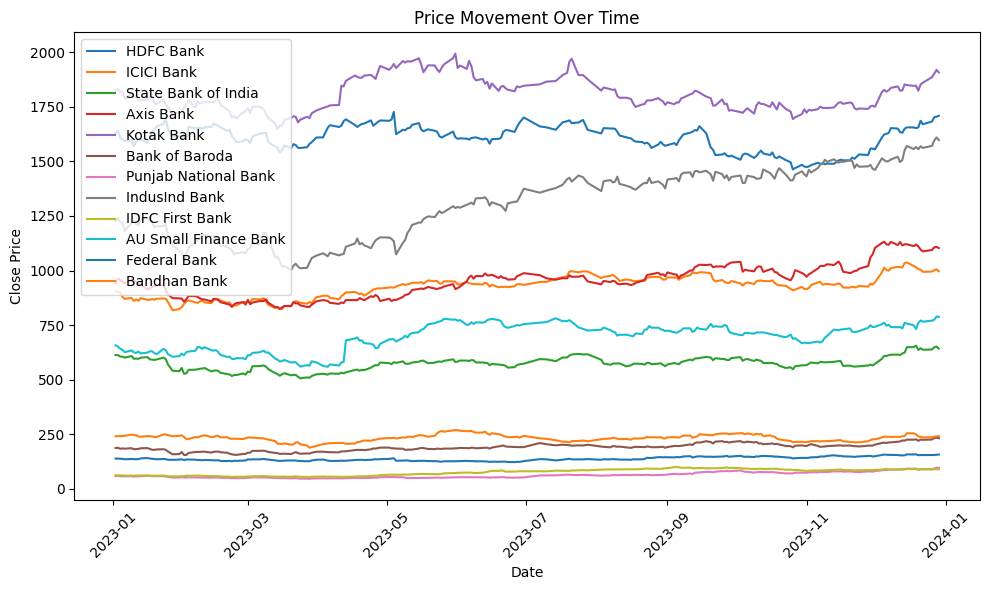

In [7]:
plt.figure(figsize=(10, 6))
for bank in df_individual['Index'].unique():
    bank_data = df_individual[df_individual['Index'] == bank]
    plt.plot(bank_data['Date'], bank_data['Close'], label=bank)

plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Price Movement Over Time')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


Moving Averages (10-day, 30-day)

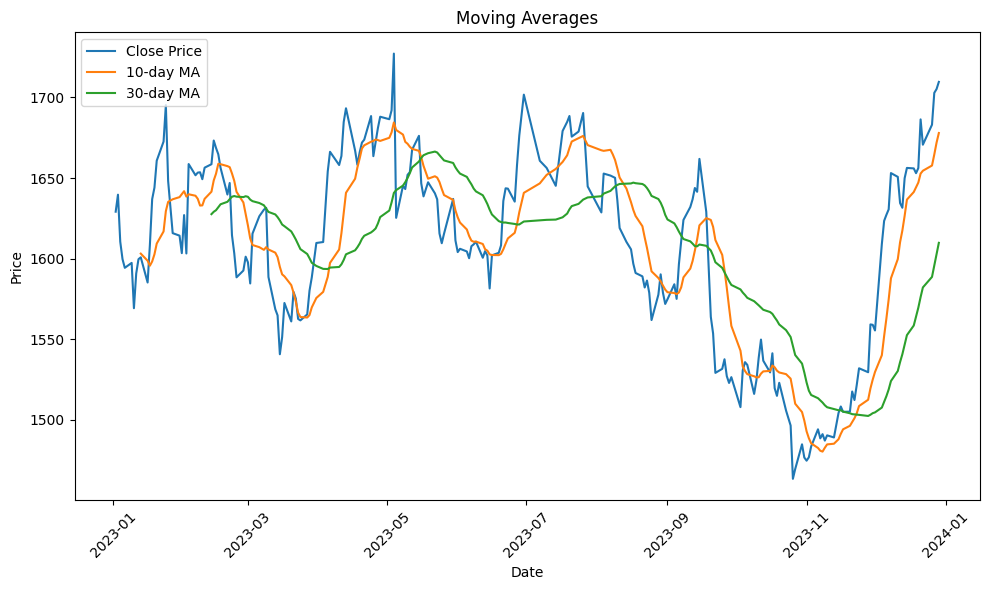

In [8]:
# Add moving averages for each bank
df_individual['10_MA'] = df_individual.groupby('Index')['Close'].transform(lambda x: x.rolling(window=10).mean())
df_individual['30_MA'] = df_individual.groupby('Index')['Close'].transform(lambda x: x.rolling(window=30).mean())

# Plot moving averages for a single bank (modify for others)
bank_data = df_individual[df_individual['Index'] == 'HDFC Bank']
plt.figure(figsize=(10, 6))
plt.plot(bank_data['Date'], bank_data['Close'], label='Close Price')
plt.plot(bank_data['Date'], bank_data['10_MA'], label='10-day MA')
plt.plot(bank_data['Date'], bank_data['30_MA'], label='30-day MA')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Moving Averages')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


3.Daily Price Range

Box Plot for Price Volatility

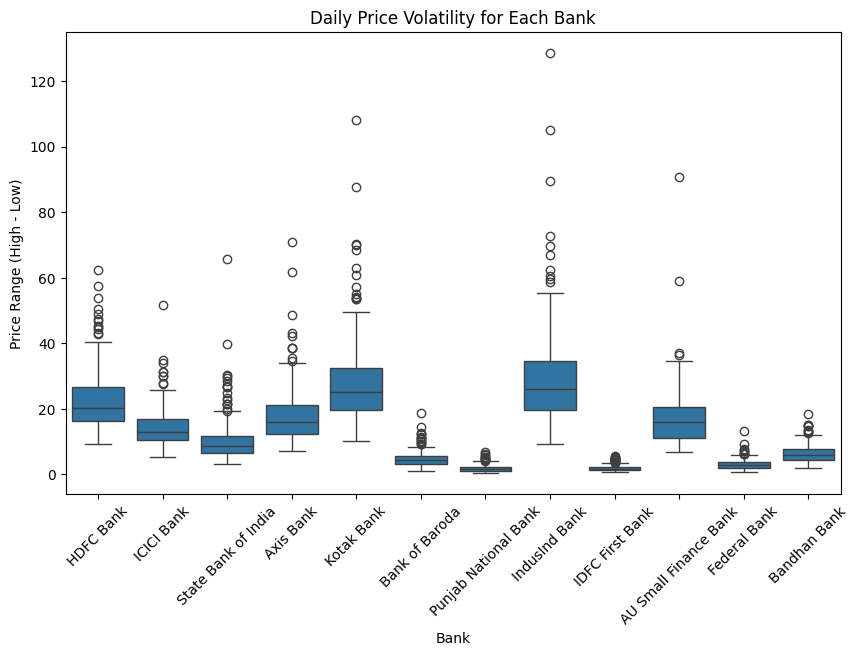

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Index', y=df_individual['High'] - df_individual['Low'], data=df_individual)
plt.xticks(rotation=45)
plt.title('Daily Price Volatility for Each Bank')
plt.xlabel('Bank')
plt.ylabel('Price Range (High - Low)')
plt.show()


4. Volatility Analysis (Rolling Standard Deviation)

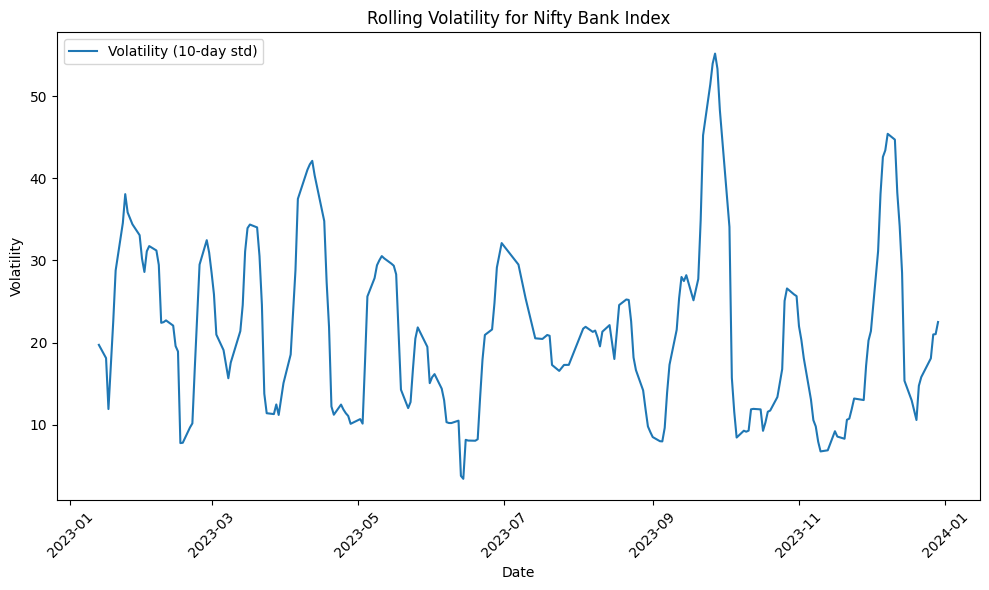

In [10]:
df_individual['volatility'] = df_individual.groupby('Index')['Close'].transform(lambda x: x.rolling(window=10).std())

# Plot volatility for a single bank
bank_data = df_individual[df_individual['Index'] == 'HDFC Bank']
plt.figure(figsize=(10, 6))
plt.plot(bank_data['Date'], bank_data['volatility'], label='Volatility (10-day std)')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.title('Rolling Volatility for Nifty Bank Index')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


5. Correlation Heatmap

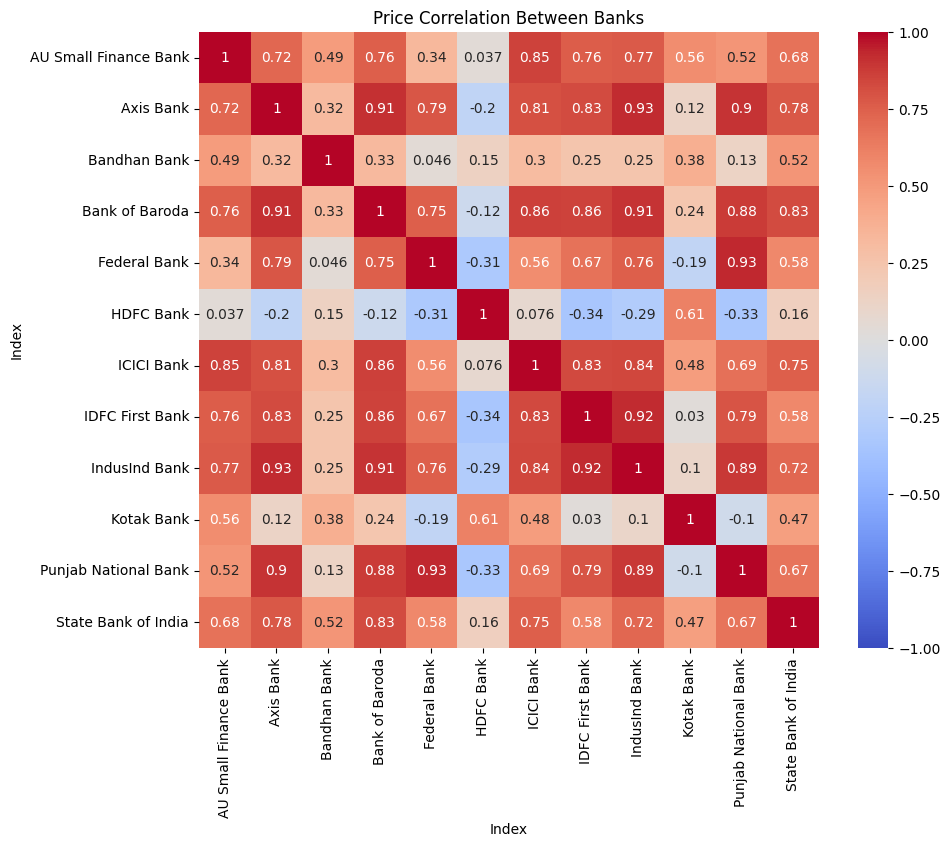

In [11]:
# Create a pivot table to get Close prices for each bank by date
pivot_data = df_individual.pivot_table(values='Close', index='Date', columns='Index')

# Compute the correlation matrix
corr_matrix = pivot_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Price Correlation Between Banks')
plt.show()


6. Month-on-Month Price Comparison

Monthly Aggregation and Performance Bar Plot

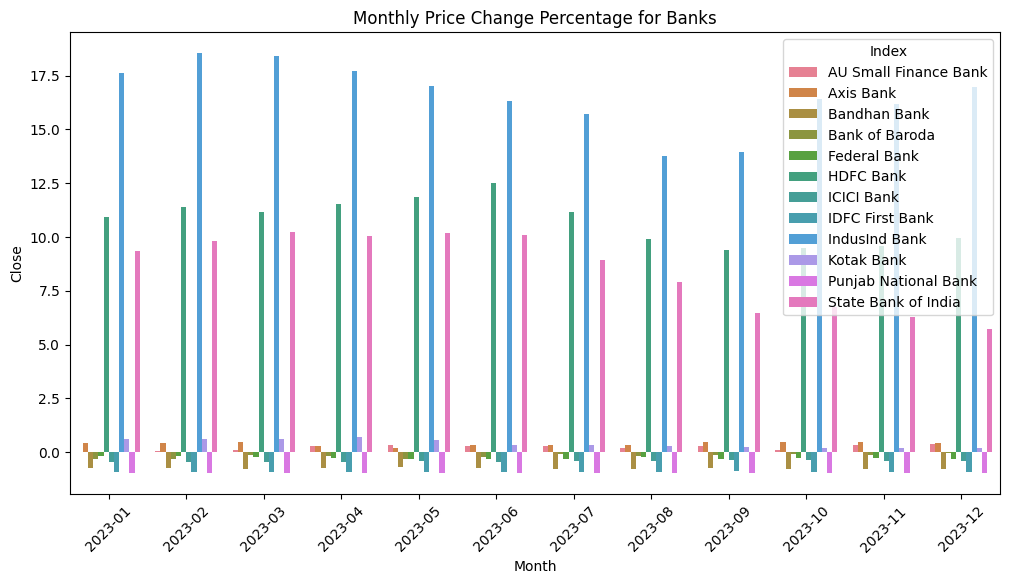

In [12]:
# Convert 'Date' column to datetime format and extract the month
df_individual['Date'] = pd.to_datetime(df_individual['Date'])
df_individual['Month'] = df_individual['Date'].dt.strftime('%Y-%m')

# Group by Month and Index to calculate monthly performance
monthly_performance = df_individual.groupby(['Month', 'Index'])['Close'].last().pct_change().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='Close', hue='Index', data=monthly_performance)
plt.xticks(rotation=45)
plt.title('Monthly Price Change Percentage for Banks')
plt.show()


7. Trend Analysis

Adding a Trendline

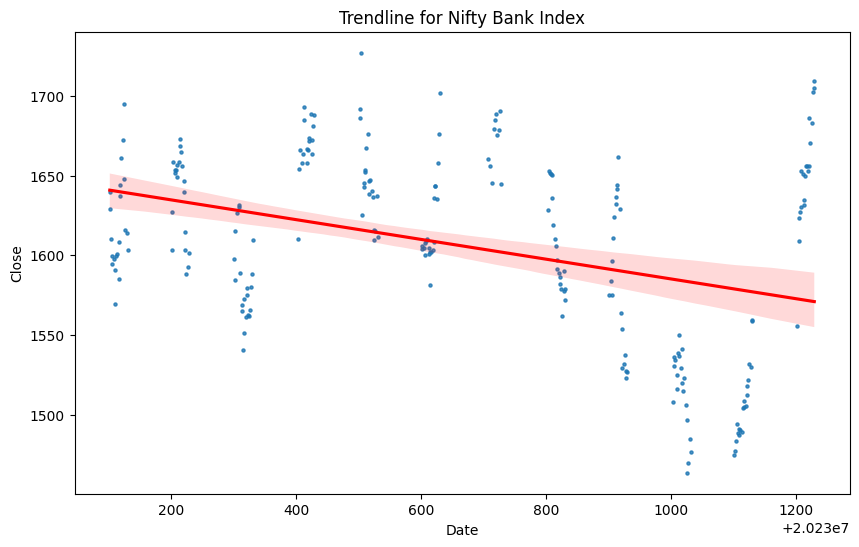

In [13]:
bank_data = df_individual[df_individual['Index'] == 'HDFC Bank']
plt.figure(figsize=(10, 6))
sns.regplot(x=pd.to_numeric(bank_data['Date'].dt.strftime('%Y%m%d')), y=bank_data['Close'], scatter_kws={"s": 5}, line_kws={"color": "red"})
plt.title('Trendline for Nifty Bank Index')
plt.show()


8. Price Change Distribution

Histogram of Daily Returns

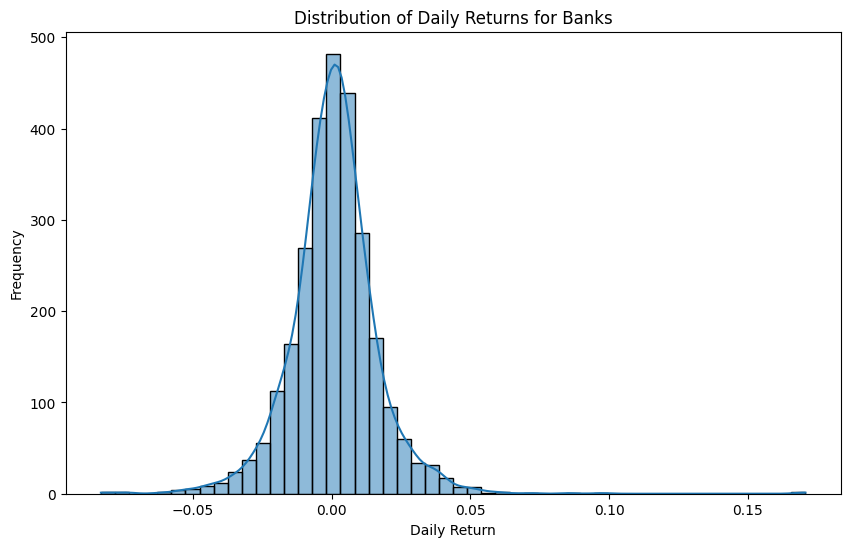

In [14]:
df_individual['daily_return'] = df_individual.groupby('Index')['Close'].pct_change()

# Plot histogram of daily returns for all banks
plt.figure(figsize=(10, 6))
sns.histplot(df_individual['daily_return'].dropna(), kde=True, bins=50)
plt.title('Distribution of Daily Returns for Banks')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()


10. Relative Strength Index (RSI)

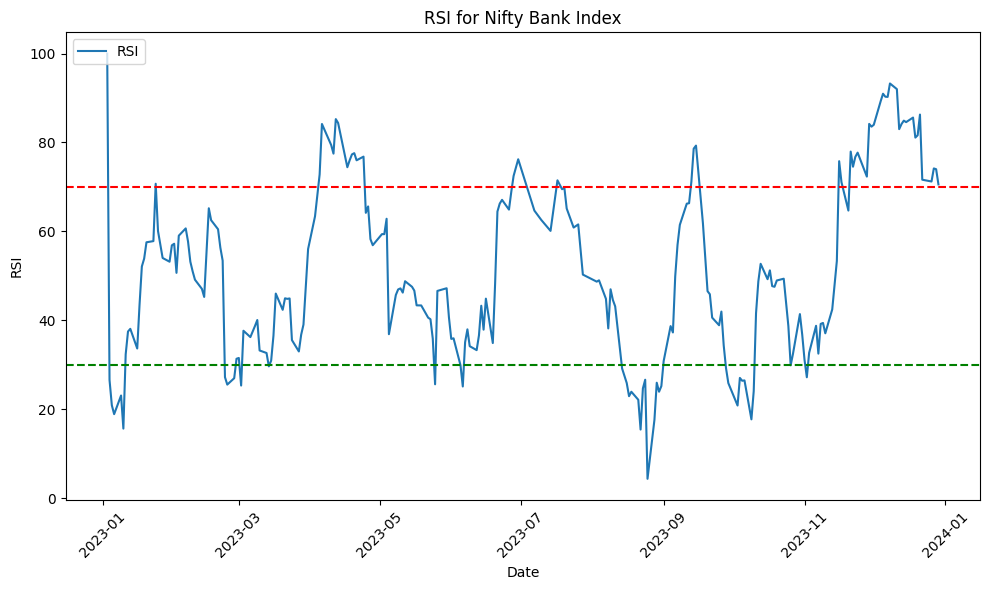

In [15]:
def calculate_RSI(data, window=14):
    delta = data.diff()
    gain = np.where(delta > 0, delta, 0)
    loss = np.where(delta < 0, -delta, 0)
    avg_gain = pd.Series(gain).rolling(window=window, min_periods=1).mean()
    avg_loss = pd.Series(loss).rolling(window=window, min_periods=1).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

df_individual['RSI'] = df_individual.groupby('Index')['Close'].transform(calculate_RSI)

# Plot RSI for a single bank
bank_data = df_individual[df_individual['Index'] == "HDFC Bank"]
plt.figure(figsize=(10, 6))
plt.plot(bank_data['Date'], bank_data['RSI'], label='RSI')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('RSI')
plt.title('RSI for Nifty Bank Index')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
